In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


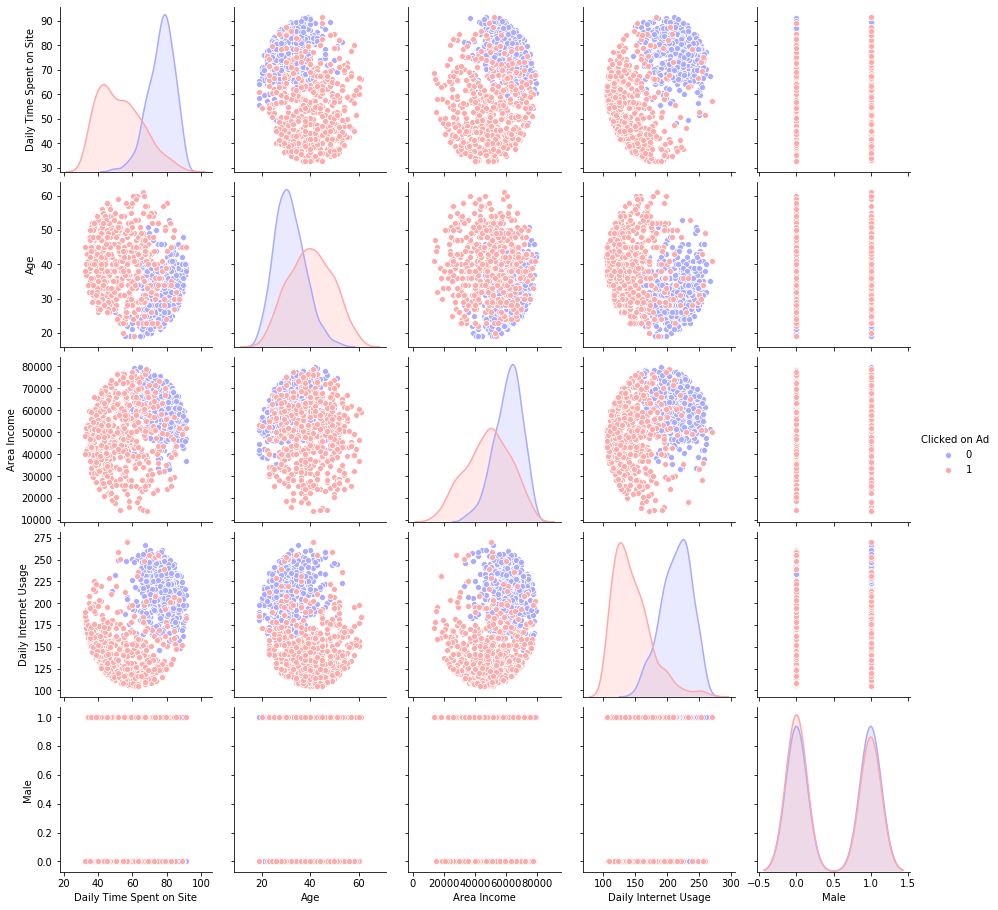

In [24]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

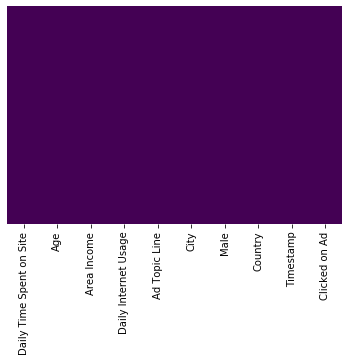

In [7]:
#checking null values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

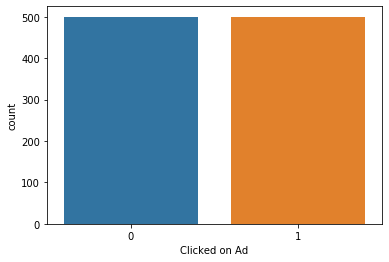

In [14]:
sns.countplot(x='Clicked on Ad',data=df)

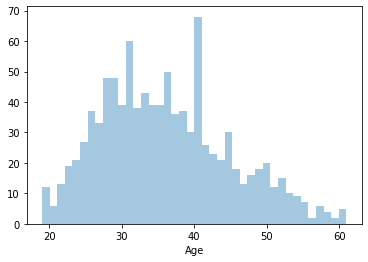

In [10]:
sns.distplot(df['Age'],bins=40,kde=False)

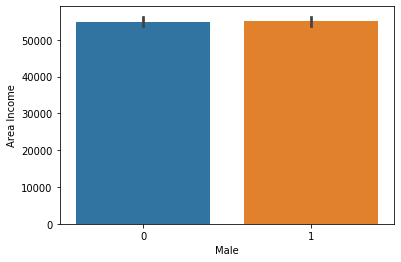

In [15]:
sns.barplot(x='Male',y='Area Income',data=df)

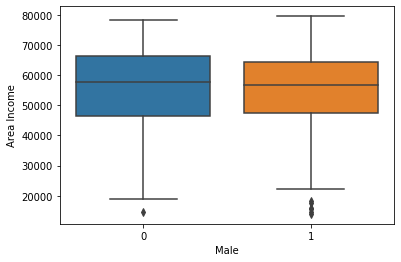

In [18]:
sns.boxplot(x='Male',y='Area Income',data=df)

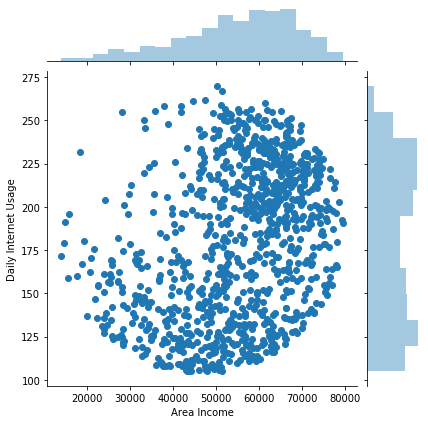

In [20]:
sns.jointplot(x='Area Income',y='Daily Internet Usage',data=df)

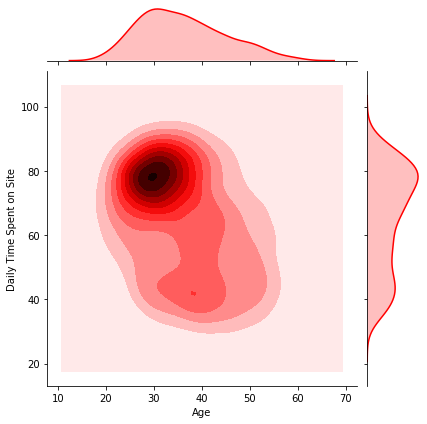

In [22]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='kde');

In [28]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lm=LogisticRegression()

In [33]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = lm.predict(X_test)

In [35]:
print(predictions)

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0]


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

